<a href="https://colab.research.google.com/github/tobinw23/Baseball-Projects/blob/main/Volpe_Day_Off.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_excel('/content/drive/MyDrive/Volpe GameLogs.xlsx')

Mounted at /content/drive


In [5]:
print(df.info())

print("\nMissing values per column:\n", df.isnull().sum())

if 'G' in df.columns:
    print("\nUnique values in 'G' column:\n", df['G'].unique())
    print("\nDescriptive statistics for 'G':\n", df['G'].describe())
else:
    print("\n'G' column not found.  Exploring other columns for days off indicator.")


game_stats_cols = ['R', 'H', 'HR', 'RBI']
for col in game_stats_cols:
    if col in df.columns:
        print(f"\nDescriptive statistics for '{col}':\n", df[col].describe())
    else:
        print(f"\n'{col}' column not found.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 38 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Rk       345 non-null    int64  
 1   Gcar     345 non-null    int64  
 2   Gtm      345 non-null    int64  
 3   Date     345 non-null    object 
 4   Team     345 non-null    object 
 5   Column1  170 non-null    object 
 6   Opp      345 non-null    object 
 7   Result   345 non-null    object 
 8   Inngs    345 non-null    object 
 9   PA       345 non-null    int64  
 10  AB       345 non-null    int64  
 11  R        345 non-null    int64  
 12  H        345 non-null    int64  
 13  2B       345 non-null    int64  
 14  3B       345 non-null    int64  
 15  HR       345 non-null    int64  
 16  RBI      345 non-null    int64  
 17  SB       345 non-null    int64  
 18  CS       345 non-null    int64  
 19  BB       345 non-null    int64  
 20  SO       345 non-null    int64  
 21  BA       345 non

In [6]:
import pandas as pd

try:
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
except KeyError:
    print("'Date' column not found in the DataFrame.")
    df['Days Since Last Day Off'] = 0
    df['Days Off'] = 0
else:
    if 'G' in df.columns:
        df['Days Off'] = (df['G'] == 0).astype(int)
    elif 'PA' in df.columns:
        df['Days Off'] = (df['PA'] == 0).astype(int)
    else:
        print("Neither 'G' nor 'PA' columns found. Cannot determine days off.")
        df['Days Off'] = 0
        df['Days Since Last Day Off'] = 0
    if 'Days Off' in df.columns:
        df['Days Since Last Day Off'] = df.groupby((df['Days Off'] != 0).cumsum())['Days Off'].transform(lambda x: (x == 0).cumsum())
    else:
        print("'Days Off' column not found. Cannot calculate days since last day off.")
        df['Days Since Last Day Off'] = 0

    display(df.head())

,Rk,Gcar,Gtm,Date,Team,Column1,Opp,Result,Inngs,PA,...,IBB,aLI,WPA,acLI,cWPA,RE24,BOP,Pos,Days Off,Days Since Last Day Off
0,1,1,1,2023-03-30,NYY,NaN,SFG,"W, 5-0",CG,3,...,0.0,0.74,0.021,0.68,0.0001,-0.40,9,SS,0,1
1,2,2,2,2023-04-01,NYY,NaN,SFG,"L, 5-7",CG,4,...,0.0,0.66,0.002,0.61,0.0000,0.14,9,SS,0,2
2,3,3,3,2023-04-02,NYY,NaN,SFG,"W, 6-0",CG,4,...,0.0,0.22,-0.004,0.20,0.0000,0.40,9,SS,0,3
3,4,4,4,2023-04-03,NYY,NaN,PHI,"W, 8-1",CG,4,...,0.0,0.25,-0.023,0.22,-0.0001,0.13,9,SS,0,4
4,5,5,5,2023-04-04,NYY,NaN,PHI,"L, 1-4",CG,3,...,0.0,0.56,-0.017,0.52,-0.0001,-0.36,9,SS,0,5


In [7]:
grouped = df.groupby('Days Since Last Day Off')

stats = ['mean', 'median', 'std', 'min', 'max']
columns_to_analyze = ['R', 'H', 'HR', 'RBI']

results = []
for col in columns_to_analyze:
   if col in df.columns:
        col_stats = grouped[col].agg(stats).to_dict()
        col_stats['column'] = col
        results.append(col_stats)
   else:
        print(f"Column '{col}' not found in DataFrame. Skipping.")

if results:
    stats_df = pd.DataFrame(results).set_index('column').T
    display(stats_df)
else:
    print("No valid columns to analyze.")

column,R,H,HR,RBI
mean,"{0: 0.25, 1: 0.2, 2: 0.4, 3: 0.4, 4: 0.4, 5: 0...","{0: 0.0, 1: 0.4, 2: 1.0, 3: 0.2, 4: 0.2, 5: 1....","{0: 0.0, 1: 0.2, 2: 0.0, 3: 0.2, 4: 0.0, 5: 0....","{0: 0.0, 1: 0.6, 2: 0.0, 3: 0.2, 4: 0.0, 5: 0...."
median,"{0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 1....","{0: 0.0, 1: 0.0, 2: 1.0, 3: 0.0, 4: 0.0, 5: 1....","{0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0....","{0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0...."
std,"{0: 0.5, 1: 0.447213595499958, 2: 0.5477225575...","{0: 0.0, 1: 0.5477225575051661, 2: 0.707106781...","{0: 0.0, 1: 0.447213595499958, 2: 0.0, 3: 0.44...","{0: 0.0, 1: 1.3416407864998738, 2: 0.0, 3: 0.4..."
min,"{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: ...","{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 1, 6: 0, 7: ...","{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: ...","{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: ..."
max,"{0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 0, 7: ...","{0: 0, 1: 1, 2: 2, 3: 1, 4: 1, 5: 2, 6: 1, 7: ...","{0: 0, 1: 1, 2: 0, 3: 1, 4: 0, 5: 1, 6: 0, 7: ...","{0: 0, 1: 3, 2: 0, 3: 1, 4: 0, 5: 2, 6: 1, 7: ..."


KeyError: 'R_mean'

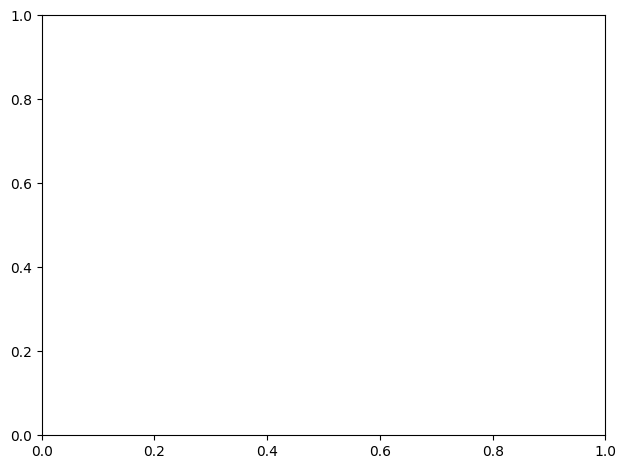

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 12))

plt.subplot(2, 2, 1)
plt.plot(stats_df.index, stats_df['R_mean'], label='Mean', color='blue')
plt.plot(stats_df.index, stats_df['R_median'], label='Median', color='green')
plt.fill_between(stats_df.index, stats_df['R_mean'] - stats_df['R_std'], stats_df['R_mean'] + stats_df['R_std'], color='blue', alpha=0.2)
plt.xlabel('Days Since Last Day Off')
plt.ylabel('Runs (R)')
plt.title('Runs (R) Statistics')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(stats_df.index, stats_df['H_mean'], label='Mean', color='blue')
plt.plot(stats_df.index, stats_df['H_median'], label='Median', color='green')
plt.fill_between(stats_df.index, stats_df['H_mean'] - stats_df['H_std'], stats_df['H_mean'] + stats_df['H_std'], color='blue', alpha=0.2)
plt.xlabel('Days Since Last Day Off')
plt.ylabel('Hits (H)')
plt.title('Hits (H) Statistics')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(stats_df.index, stats_df['HR_mean'], label='Mean', color='blue')
plt.plot(stats_df.index, stats_df['HR_median'], label='Median', color='green')
plt.fill_between(stats_df.index, stats_df['HR_mean'] - stats_df['HR_std'], stats_df['HR_mean'] + stats_df['HR_std'], color='blue', alpha=0.2)
plt.xlabel('Days Since Last Day Off')
plt.ylabel('Home Runs (HR)')
plt.title('Home Runs (HR) Statistics')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(stats_df.index, stats_df['RBI_mean'], label='Mean', color='blue')
plt.plot(stats_df.index, stats_df['RBI_median'], label='Median', color='green')
plt.fill_between(stats_df.index, stats_df['RBI_mean'] - stats_df['RBI_std'], stats_df['RBI_mean'] + stats_df['RBI_std'], color='blue', alpha=0.2)
plt.xlabel('Days Since Last Day Off')
plt.ylabel('Runs Batted In (RBI)')
plt.title('Runs Batted In (RBI) Statistics')
plt.legend()

plt.tight_layout()
plt.show()

In [14]:
def clean_date(date_str):
    if isinstance(date_str, str) and '(' in date_str:
        return date_str.split('(')[0].strip()
    return date_str
df['Date'] = df['Date'].apply(clean_date)
df['Date'] = pd.to_datetime(df['Date'])

df['Date_Diff'] = df['Date'].diff().dt.days

df['Day_Off'] = df['Date_Diff'] >= 2

df['Days_Since_Last_Day_Off'] = 0
day_off_indices = df.index[df['Day_Off']].tolist()
current_index = 0

for i in range(len(day_off_indices)):
    next_day_off_index = day_off_indices[i]
    df.loc[current_index : next_day_off_index, 'Days_Since_Last_Day_Off'] = range(next_day_off_index - current_index + 1)
    current_index = next_day_off_index + 1
df.loc[current_index:, 'Days_Since_Last_Day_Off'] = range(len(df) - current_index)

display(df.head())

,Rk,Gcar,Gtm,Date,Team,Column1,Opp,Result,Inngs,PA,...,acLI,cWPA,RE24,BOP,Pos,Days Off,Days Since Last Day Off,Date_Diff,Day_Off,Days_Since_Last_Day_Off
0,1,1,1,2023-03-30,NYY,NaN,SFG,"W, 5-0",CG,3,...,0.68,0.0001,-0.40,9,SS,0,1,NaN,False,0
1,2,2,2,2023-04-01,NYY,NaN,SFG,"L, 5-7",CG,4,...,0.61,0.0000,0.14,9,SS,0,2,2.0,True,1
2,3,3,3,2023-04-02,NYY,NaN,SFG,"W, 6-0",CG,4,...,0.20,0.0000,0.40,9,SS,0,3,1.0,False,0
3,4,4,4,2023-04-03,NYY,NaN,PHI,"W, 8-1",CG,4,...,0.22,-0.0001,0.13,9,SS,0,4,1.0,False,1
4,5,5,5,2023-04-04,NYY,NaN,PHI,"L, 1-4",CG,3,...,0.52,-0.0001,-0.36,9,SS,0,5,1.0,False,2


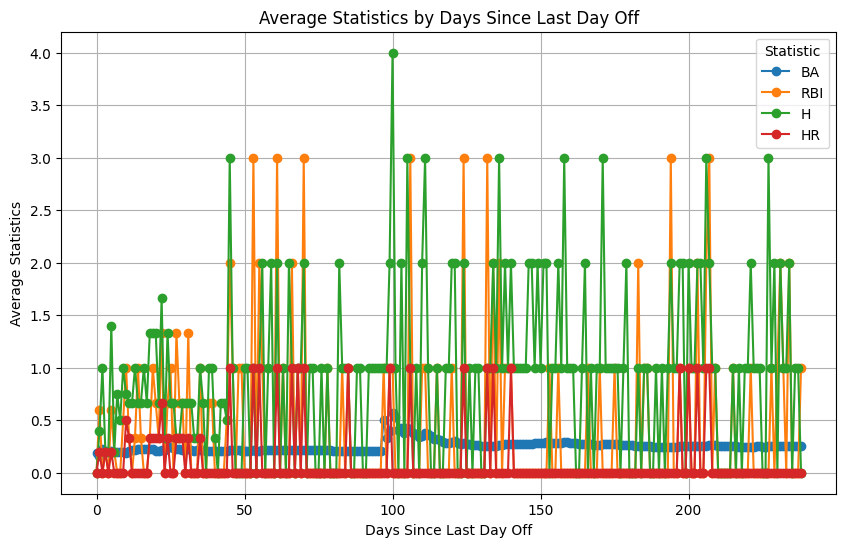

In [15]:
grouped = df.groupby('Days Since Last Day Off')[['BA', 'RBI', 'H', 'HR']].mean()

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))

grouped.plot(ax=ax, marker='o')
ax.set_xlabel('Days Since Last Day Off')
ax.set_ylabel('Average Statistics')
ax.set_title('Average Statistics by Days Since Last Day Off')
ax.legend(title='Statistic')
ax.grid(True)

plt.show()

In [16]:
grouped_data = df.groupby('Days_Since_Last_Day_Off').agg({'BA': 'mean', 'H': 'sum', 'HR': 'sum', 'RBI': 'sum', 'SLG':'mean', 'OBP': 'mean','OPS': 'mean'})

grouped_data = grouped_data.reset_index()

grouped_data = grouped_data.rename(columns={'BA': 'Avg_BA', 'H': 'Total_Hits', 'HR': 'Total_HR', 'RBI': 'Total_RBI', 'SLG': 'Avg_SLG', 'OBP':'Avg_OBP', 'OPS': 'Avg_OPS'})

display(grouped_data)

,Days_Since_Last_Day_Off,Avg_BA,Total_Hits,Total_HR,Total_RBI,Avg_SLG,Avg_OBP,Avg_OPS
0,0,0.235792,37,3,18,0.417208,0.322042,0.739292
1,1,0.240660,39,8,19,0.411426,0.319702,0.731255
2,2,0.248714,47,4,15,0.413429,0.323786,0.737071
3,3,0.237222,30,4,18,0.392972,0.310833,0.703806
4,4,0.245794,23,2,13,0.394412,0.324882,0.719382
5,5,0.239677,30,4,11,0.416645,0.309226,0.725774
6,6,0.234500,12,3,8,0.402444,0.312889,0.715389
7,7,0.236889,19,1,6,0.402667,0.317167,0.719778
8,8,0.240529,17,2,11,0.404412,0.319882,0.724471
9,9,0.241923,6,0,1,0.394308,0.324385,0.718462


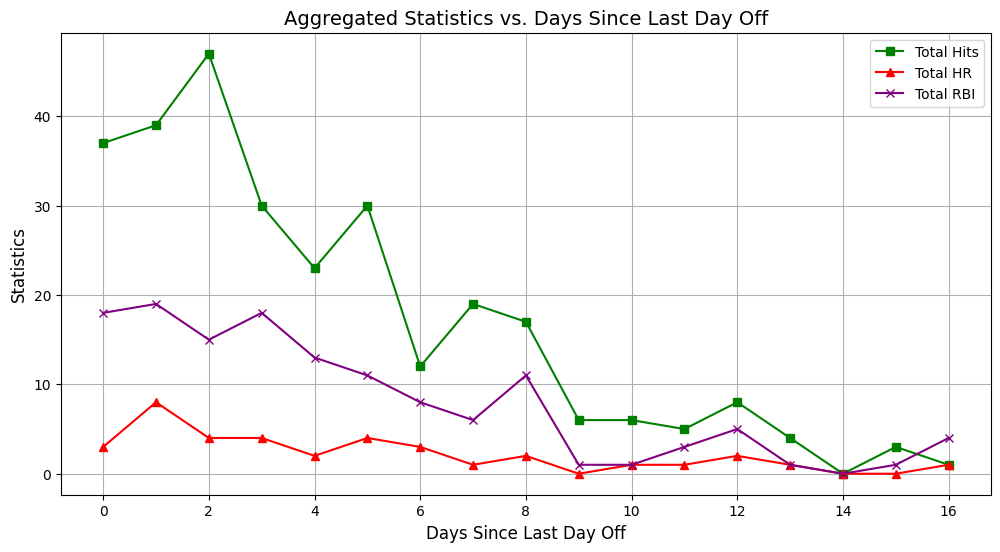

In [17]:
plt.figure(figsize=(12, 6))


plt.plot(grouped_data['Days_Since_Last_Day_Off'], grouped_data['Total_Hits'], marker='s', linestyle='-', label='Total Hits', color='green')
plt.plot(grouped_data['Days_Since_Last_Day_Off'], grouped_data['Total_HR'], marker='^', linestyle='-', label='Total HR', color='red')
plt.plot(grouped_data['Days_Since_Last_Day_Off'], grouped_data['Total_RBI'], marker='x', linestyle='-', label='Total RBI', color='purple')

plt.title('Aggregated Statistics vs. Days Since Last Day Off', fontsize=14)
plt.xlabel('Days Since Last Day Off', fontsize=12)
plt.ylabel('Statistics', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)

plt.show()

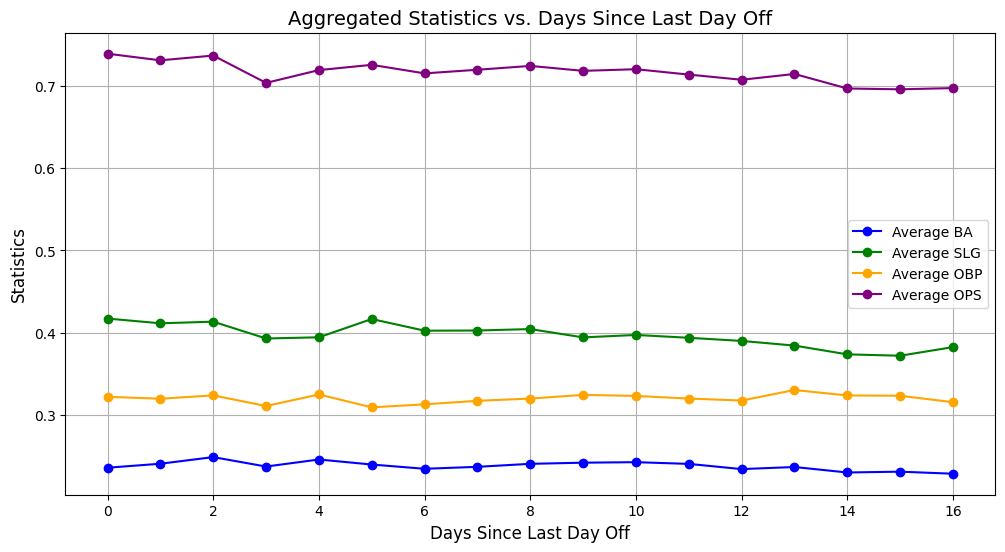

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(grouped_data['Days_Since_Last_Day_Off'], grouped_data['Avg_BA'], marker='o', linestyle='-', label='Average BA', color='blue')
plt.plot(grouped_data['Days_Since_Last_Day_Off'], grouped_data['Avg_SLG'], marker='o', linestyle='-', label='Average SLG', color='green')
plt.plot(grouped_data['Days_Since_Last_Day_Off'], grouped_data['Avg_OBP'], marker='o', linestyle='-', label='Average OBP', color='orange')
plt.plot(grouped_data['Days_Since_Last_Day_Off'], grouped_data['Avg_OPS'], marker='o', linestyle='-', label='Average OPS', color='purple')

plt.title('Aggregated Statistics vs. Days Since Last Day Off', fontsize=14)
plt.xlabel('Days Since Last Day Off', fontsize=12)
plt.ylabel('Statistics', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)

In [30]:
import scipy.stats as stats

day_off_data = df[df['Day_Off'] == True]
no_day_off_data = df[df['Day_Off'] == False]

results = {}
for col in ['BA', 'RBI', 'H', 'HR', 'SLG', 'OBP', 'OPS']:
    if col in df.columns:
        t_statistic, p_value = stats.ttest_ind(day_off_data[col], no_day_off_data[col], nan_policy='omit')
        results[col] = {'t_statistic': t_statistic, 'p_value': p_value}
    else:
        print(f"Column '{col}' not found in the DataFrame.")
        results[col] = {'t_statistic': None, 'p_value': None}

for col, stats in results.items():
    print(f"Column: {col}")
    print(f"  T-statistic: {stats['t_statistic']}")
    print(f"  P-value: {stats['p_value']}")
    print("-" * 20)


Column: BA
  T-statistic: 1.2104499887373947
  P-value: 0.22693972169543944
--------------------
Column: RBI
  T-statistic: 2.2565051408368437
  P-value: 0.024668072875950988
--------------------
Column: H
  T-statistic: 1.544214478204076
  P-value: 0.12345846944798408
--------------------
Column: HR
  T-statistic: 1.4340528136260489
  P-value: 0.15246819797910746
--------------------
Column: SLG
  T-statistic: 2.2720536123602466
  P-value: 0.02370193252076792
--------------------
Column: OBP
  T-statistic: 1.2143935650875604
  P-value: 0.2254328782352913
--------------------
Column: OPS
  T-statistic: 2.1574940809814316
  P-value: 0.031661140381739804
--------------------
